In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("C:/Users/ganes/Downloads/Shill Bidding Dataset.csv")
df.head(30)

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
5,8,900,i***e,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,7,0
6,10,900,m***p,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,7,0
7,12,900,k***a,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1
8,13,2370,g***r,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,7,1
9,27,600,e***t,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,7,1


In [4]:
df.count()

Record_ID                 6321
Auction_ID                6321
Bidder_ID                 6321
Bidder_Tendency           6321
Bidding_Ratio             6321
Successive_Outbidding     6321
Last_Bidding              6321
Auction_Bids              6321
Starting_Price_Average    6321
Early_Bidding             6321
Winning_Ratio             6321
Auction_Duration          6321
Class                     6321
dtype: int64

In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


In [6]:
df1 = df.drop(columns=['Record_ID','Auction_ID','Bidder_ID'],axis=0)
df1.head(15)

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
5,0.038462,0.111111,0.0,0.016844,0.000000,0.000000,0.016844,0.800000,7,0
6,0.400000,0.222222,0.0,0.006781,0.000000,0.000000,0.006774,0.750000,7,0
7,0.137931,0.444444,1.0,0.768044,0.000000,0.000000,0.016311,1.000000,7,1
8,0.121951,0.185185,1.0,0.035021,0.333333,0.993528,0.023963,0.944444,7,1
9,0.155172,0.346154,0.5,0.570994,0.307692,0.993593,0.413788,0.611111,7,1


<AxesSubplot:xlabel='Class', ylabel='count'>

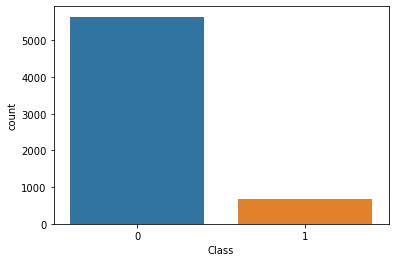

In [7]:
sns.countplot(data=df1,x='Class')

In [8]:
X=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

In [11]:
MLPC=MLPClassifier(hidden_layer_sizes=(15,),max_iter=10000)
MLPC.fit(X_train,Y_train)
y_pred=MLPC.predict(X_test)
acc=accuracy_score(Y_test,y_pred)
print(acc)

0.9931470743278862


Text(0.5, 15.0, 'Predicted Label')

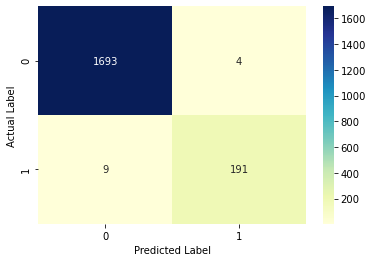

In [12]:
cnf_matrix = confusion_matrix(y_pred,Y_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [13]:
svm = SVC()
svm.fit(X_train, Y_train)
y_pred_svm=svm.predict(X_test)
acc=accuracy_score(y_pred_svm,Y_test)
acc

0.9973642593568793

Text(0.5, 15.0, 'Predicted Label')

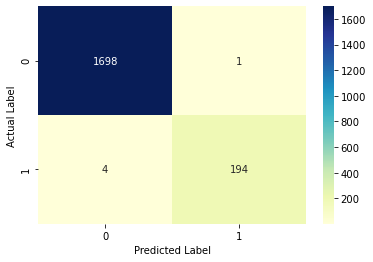

In [14]:
cnf_matrix = confusion_matrix(y_pred_svm,Y_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [15]:
l=[]
for i in range(len(y_pred)):
    l.append(y_pred[i] or y_pred_svm[i])
l1=np.array(l)
l1

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [16]:
ac1=accuracy_score(l1,Y_test)
ac1 

0.9931470743278862

Text(0.5, 15.0, 'Predicted Label')

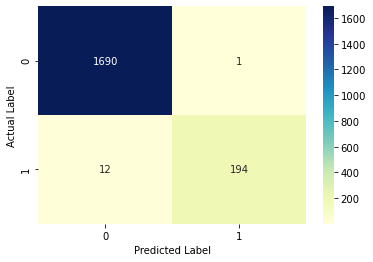

In [17]:
cnf_matrix = confusion_matrix(l1,Y_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [18]:
from sklearn.cluster import KMeans

In [19]:
t=df1.drop(['Class'],axis=1)
t

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
0,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5
1,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5
2,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5
3,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5
4,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7
...,...,...,...,...,...,...,...,...,...
6316,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3
6317,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7
6318,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7
6319,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7


In [20]:
t1= KMeans(n_clusters = 2, init = 'random', max_iter = 300, n_init = 10, random_state = 0) 

In [21]:
t1.fit(X_train)

KMeans(init='random', n_clusters=2, random_state=0)

In [22]:
l=t1.predict(X_test)

In [23]:
l

array([0, 0, 1, ..., 0, 0, 0])

In [24]:
print(accuracy_score(l,Y_test))

0.4422772799156563


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2500)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2500)

In [26]:
y_pred=knn.predict(X_test)
print(accuracy_score(y_pred,Y_test))

0.897206114918292
